### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ethereum_classic_price

#### 1. Read the Data

In [2]:
# Read bitconnect_price file
df = pd.read_csv('../data/raw/ethereum_classic_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,15.82,16.85,14.30,16.58,"218,190,000","1,506,490,000"
1,2017-09-04,18.54,18.71,15.37,15.84,"243,535,000","1,764,650,000"
2,2017-09-03,20.18,20.47,18.07,18.57,"221,986,000","1,920,050,000"
3,2017-09-02,22.04,23.68,18.18,20.08,"648,787,000","2,096,550,000"
4,2017-09-01,16.40,22.45,16.32,21.94,"821,440,000","1,559,510,000"


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          409
Open          409
High          409
Low           409
Close         409
Volume        409
Market Cap    409
dtype: int64

as we can see we have in this file 7 columns and each column has 409 cells

In [5]:
df.describe()

,Open,High,Low,Close
count,409.000000,409.000000,409.000000,409.000000
mean,5.775844,6.094761,5.475332,5.812246
std,6.794953,7.170771,6.398472,6.806962
min,0.604737,0.766068,0.452446,0.602402
25%,1.210000,1.240000,1.170000,1.210000
50%,1.610000,1.740000,1.440000,1.610000
75%,13.690000,14.110000,12.250000,13.810000
max,23.030000,24.620000,21.970000,23.270000


In [6]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 7 columns):
Date          409 non-null datetime64[ns]
Open          409 non-null float64
High          409 non-null float64
Low           409 non-null float64
Close         409 non-null float64
Volume        409 non-null object
Market Cap    409 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 22.5+ KB


In [7]:
#check if the dataset is duplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
404    False
405    False
406    False
407    False
408    False
Length: 409, dtype: bool

In [8]:
# check and print the number of empty cells (missing data) in each coulmn 
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

as we can see the data frame has 7 columns. each column has 409 cell, and there is no missing data, 
* Volume and Market cap data type are object, it should be number. 

#### 2. Cleaning Data

as i mentioned before the "Volume and Market Cap" have different format and python concedered that as a string not number, so we have to convert all strings into numbers and 
     

In [13]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'numpy.int64'>
Market Cap Data Type : <class 'int'>


In [14]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Market Cap']=="-",'Market Cap']=0

In [15]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',','')))

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,409.000000,409.000000,409.000000,409.000000,4.090000e+02,4.090000e+02
mean,5.775844,6.094761,5.475332,5.812246,4.833992e+07,5.325042e+08
std,6.794953,7.170771,6.398472,6.806962,1.008472e+08,6.385963e+08
min,0.604737,0.766068,0.452446,0.602402,2.673670e+05,0.000000e+00
25%,1.210000,1.240000,1.170000,1.210000,1.366170e+06,1.042510e+08
50%,1.610000,1.740000,1.440000,1.610000,5.549740e+06,1.353890e+08
75%,13.690000,14.110000,12.250000,13.810000,5.243400e+07,1.294140e+09
max,23.030000,24.620000,21.970000,23.270000,8.214400e+08,2.135600e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 7 columns):
Date          409 non-null datetime64[ns]
Open          409 non-null float64
High          409 non-null float64
Low           409 non-null float64
Close         409 non-null float64
Volume        409 non-null int64
Market Cap    409 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.5 KB


In [17]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.994673,0.996925,0.993355,0.686234,0.999874
High,0.994673,1.000000,0.992396,0.997629,0.736214,0.994364
Low,0.996925,0.992396,1.000000,0.994873,0.665199,0.997044
Close,0.993355,0.997629,0.994873,1.000000,0.712641,0.993206
Volume,0.686234,0.736214,0.665199,0.712641,1.000000,0.685462
Market Cap,0.999874,0.994364,0.997044,0.993206,0.685462,1.000000


as we can see, the "Market Cap and many other variables are almost the same, so let's plot data between Market Cap and other variable, then see the relation between the data


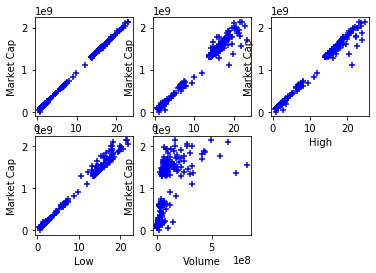

In [18]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [19]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [20]:
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Model Score
model.score(Open, Market_Cap)

0.9997481154575999

#### 4. Data Visualization

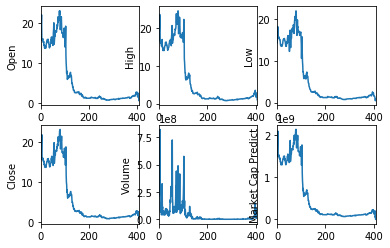

In [22]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df['Market Cap'].plot()